1.4.1. Пример: вывод поведения на основе данных по обмену текстовыми сообщениями

(0.0, 74.0)

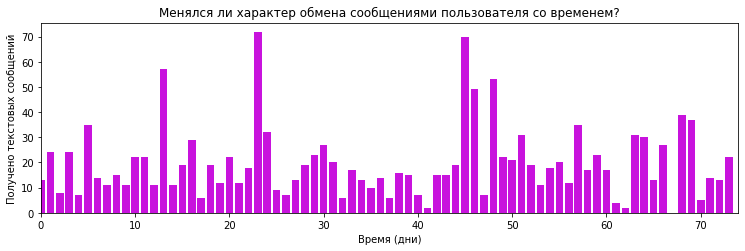

In [1]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt 


figsize(12.5, 3.5)
count_data = np.loadtxt("data/txtdata.csv") # список, количество текстовых сообщений
n_count_data = len(count_data)
plt.bar(np.arange(n_count_data), count_data, color="#c813dd")
plt.xlabel("Время (дни)")
plt.ylabel("Получено текстовых сообщений")
plt.title("Менялся ли характер обмена сообщениями пользователя со временем?")
plt.xlim(0, n_count_data)

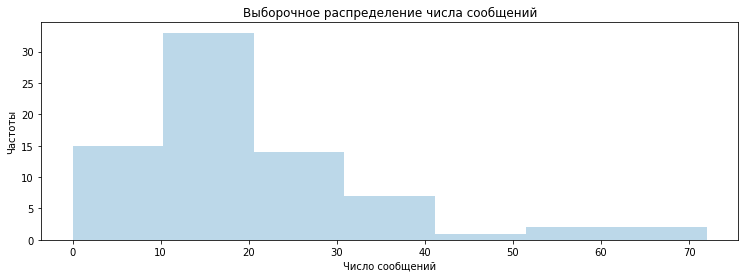

In [32]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt

figsize(12.5,4)
#plt.rcParams['savefig.dpi'] = 300
#plt.rcParams['figure.dpi'] = 300


plt.hist(count_data, bins=7, color='#348ABD',alpha=.33)
plt.title("Выборочное распределение числа сообщений")
plt.xlabel("Число сообщений")
plt.ylabel("Частоты")
plt.show()

In [5]:
len(count_data)

74

1.4.2. Наш первый инструмент: PyMC

Загрузим модуль PyMC

In [8]:
# Установили модуль PyMC
# import sys
# !{sys.executable} -m pip install pymc

In [43]:
count_data # это наблюденные данные

array([13., 24.,  8., 24.,  7., 35., 14., 11., 15., 11., 22., 22., 11.,
       57., 11., 19., 29.,  6., 19., 12., 22., 12., 18., 72., 32.,  9.,
        7., 13., 19., 23., 27., 20.,  6., 17., 13., 10., 14.,  6., 16.,
       15.,  7.,  2., 15., 15., 19., 70., 49.,  7., 53., 22., 21., 31.,
       19., 11., 18., 20., 12., 35., 17., 23., 17.,  4.,  2., 31., 30.,
       13., 27.,  0., 39., 37.,  5., 14., 13., 22.])

In [2]:
# формализация модели на питоне
import pymc as pm

alpha = 1.0/count_data.mean() # α = 1/E[λ|α] ~ 1/Sum(Ci)/N. Напомню, что count_data — переменная, 
                              # хранящая количество текстовых сообщений
lambda_1 = pm.Exponential("lambda_1", alpha) #генератор случайных чисел, ck/ переменная λ1 ∼ Exp(α), 
# априорное распределение для первого варианта поведения
lambda_2 = pm.Exponential("lambda_2", alpha) #генератор случайных чисел λ2 ∼ Exp(α)
# априорное распределение для второго варианта поведения
tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data) #генератор случайных чисел P(τ = k) = 1 / 74 [τ ∼ DiscreteUniform(1, 74)]
# априорное распределение для дня смены поведения

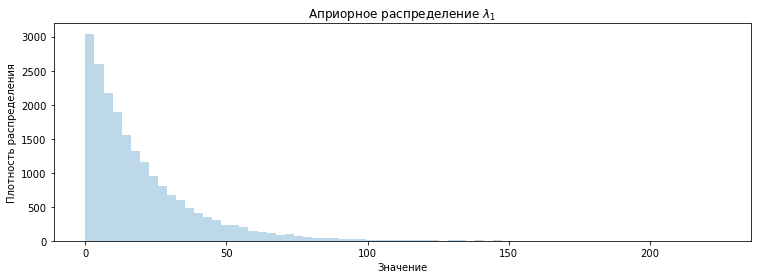

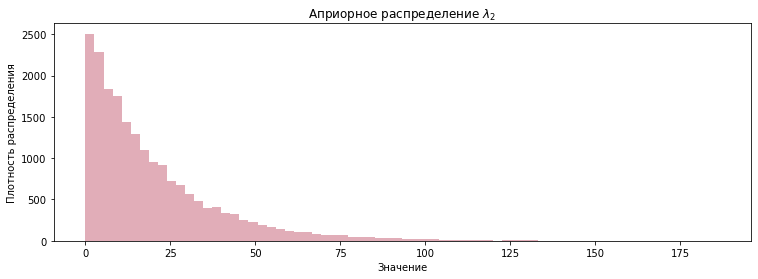

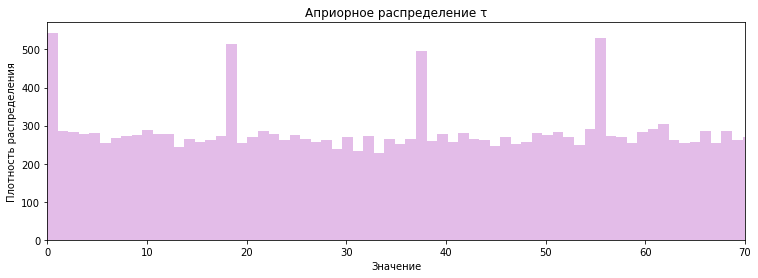

In [28]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt

figsize(12.5,4)
#plt.rcParams['savefig.dpi'] = 300
#plt.rcParams['figure.dpi'] = 300

samples1 = [float(lambda_1.random()) for i in range(20000)]
plt.hist(samples1, bins=70, color='#348ABD',alpha=.33)
plt.title("Априорное распределение $\lambda_1$")
plt.xlabel("Значение")
plt.ylabel("Плотность распределения")
plt.show()

samples2 = [float(lambda_2.random()) for i in range(20000)]
plt.hist(samples2, bins=70, color='#A60628',alpha=.33)
plt.title("Априорное распределение $\lambda_2$")
plt.xlabel("Значение")
plt.ylabel("Плотность распределения")
plt.show()

samples2 = [float(tau.random()) for i in range(20000)]
plt.hist(samples2, bins=70, color='#ac34bc',alpha=.33)
plt.title("Априорное распределение "+chr(964))
plt.xlabel("Значение")
plt.ylabel("Плотность распределения")
plt.xlim(0,70)
plt.show()

In [12]:
# сгенерируем конкретное значение случайной переменной
lambda_1.random(), tau.random(),tau.random(),tau.random()

(array(6.29011712), array(13), array(19), array(13))

In [21]:
@pm.deterministic
def lambda_(tau=tau, lambda_1=lambda_1, lambda_2=lambda_2):
    out = np.zeros(n_count_data)   # количество точек данных
    out[:tau] = lambda_1   # lambda до дня tau равна lambda_1
    out[tau:] = lambda_2   # lambda после дня tau (и включая его) равна lambda_2
    return out

In [31]:
lambda_.value

array([46.50695704, 46.50695704, 46.50695704, 46.50695704, 46.50695704,
       46.50695704, 46.50695704, 46.50695704, 46.50695704, 46.50695704,
       46.50695704, 46.50695704, 46.50695704, 46.50695704, 46.50695704,
       46.50695704, 46.50695704, 46.50695704, 46.50695704, 46.50695704,
       46.50695704, 46.50695704, 46.50695704, 46.50695704, 46.50695704,
       46.50695704, 46.50695704, 46.50695704, 46.50695704, 46.50695704,
       46.50695704, 46.50695704,  1.34969107,  1.34969107,  1.34969107,
        1.34969107,  1.34969107,  1.34969107,  1.34969107,  1.34969107,
        1.34969107,  1.34969107,  1.34969107,  1.34969107,  1.34969107,
        1.34969107,  1.34969107,  1.34969107,  1.34969107,  1.34969107,
        1.34969107,  1.34969107,  1.34969107,  1.34969107,  1.34969107,
        1.34969107,  1.34969107,  1.34969107,  1.34969107,  1.34969107,
        1.34969107,  1.34969107,  1.34969107,  1.34969107,  1.34969107,
        1.34969107,  1.34969107,  1.34969107,  1.34969107,  1.34

In [25]:
observation = pm.Poisson("obs", lambda_, value=count_data, observed=True)
model = pm.Model([observation, lambda_1, lambda_2, tau])

In [70]:
# Таинственный код, который я поясню в главе 3.
# Достаточно сказать, что мы получим 30 000 (40 000 минус 10 000) выборок.
mcmc = pm.MCMC(model)
mcmc.sample(40000, 10000)

C:\ProgramData\Anaconda3\lib\site-packages\pymc\MCMC.py:81: UserWarning: Instantiating a Model object directly is deprecated. We recommend passing variables directly to the Model subclass.
  warnings.warn(message)


 [-----------------100%-----------------] 40000 of 40000 complete in 10.5 sec

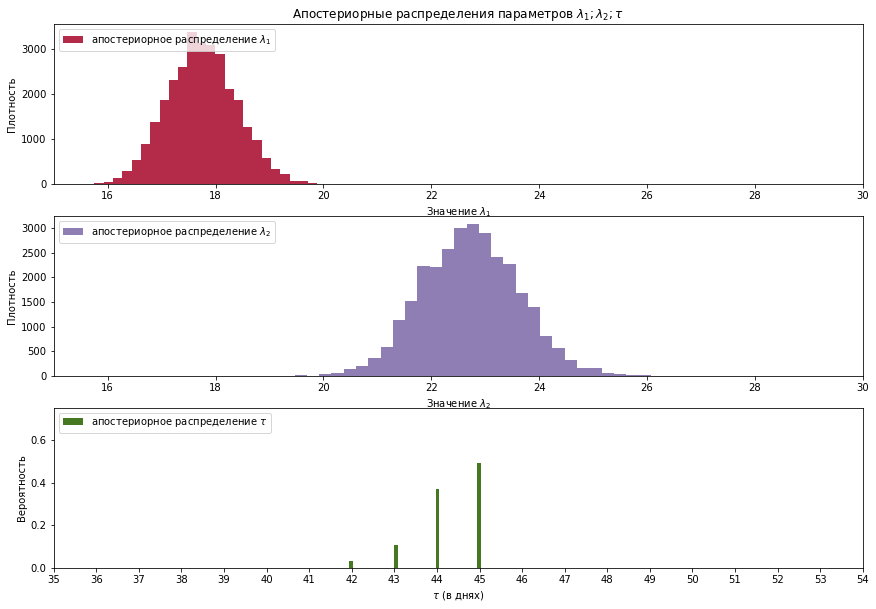

In [71]:
lambda_1_samples = mcmc.trace('lambda_1')[:]
lambda_2_samples = mcmc.trace('lambda_2')[:]
tau_samples = mcmc.trace('tau')[:]

figsize(14.5, 10)

# Гистограмма выборок

ax = plt.subplot(311)
ax.set_autoscaley_on(True)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label=r"апостериорное распределение $\lambda_1$", color="#A60628",
         )
plt.legend(loc="upper left")
plt.title(r"Апостериорные распределения параметров $\lambda_1; \lambda_2; \tau $")
plt.xlim([15, 30])
plt.xlabel(r"Значение $\lambda_1$")
plt.ylabel("Плотность")

ax = plt.subplot(312)
ax.set_autoscaley_on(True)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label=r"апостериорное распределение $\lambda_2$", color="#7A68A6",
         )
plt.legend(loc="upper left")
plt.xlim([15, 30])
plt.xlabel(r"Значение $\lambda_2$")
plt.ylabel("Плотность")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1,
         label=r"апостериорное распределение $\tau$", color="#467821",
         weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))
plt.legend(loc="upper left")
plt.ylim([0, .75])
plt.xlim([35, len(count_data)-20])
plt.xlabel(r"$\tau$ (в днях)")
plt.ylabel("Вероятность");

1.4.3.  Толкование результатов

1.4.4. Какую пользу могут принести выборки из апостериорного распределения?

Мы будем пытаться ответить на вынесенный в заголовок вопрос на протяжении всей оставшейся части книги, и будет преуменьшением сказать, что это даст потрясающие результаты. 


[17.76790389 17.76790389 17.76790389 17.76790389 17.76790389 17.76790389
 17.76790389 17.76790389 17.76790389 17.76790389 17.76790389 17.76790389
 17.76790389 17.76790389 17.76790389 17.76790389 17.76790389 17.76790389
 17.76790389 17.76790389 17.76790389 17.76790389 17.76790389 17.76790389
 17.76790389 17.76790389 17.76790389 17.76790389 17.76788244 17.76779744
 17.76774063 17.76770526 17.76764741 17.76758656 17.76759276 17.76759276
 17.76759896 17.7679832  17.76827017 17.76907007 17.76960753 17.77345877
 17.92308275 18.4253924  20.20530711 22.71546133 22.71555934 22.71555934
 22.71555934 22.71555934 22.71555934 22.71555934 22.71555934 22.71555934
 22.71555934 22.71555934 22.71555934 22.71555934 22.71555934 22.71555934
 22.71555934 22.71555934 22.71555934 22.71555934 22.71555934 22.71555934
 22.71555934 22.71555934 22.71555934 22.71555934 22.71555934 22.71555934
 22.71555934 22.71555934]


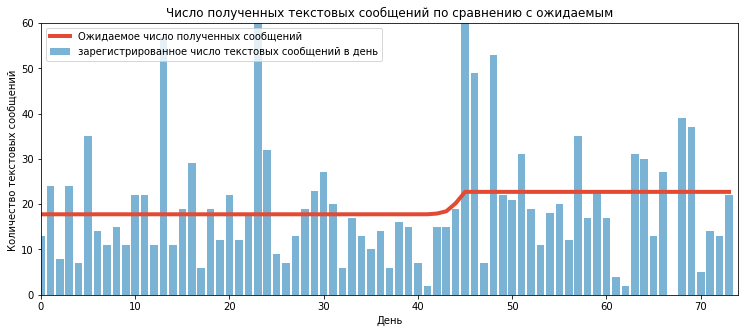

In [47]:
figsize(12.5, 5)
# tau_samples, lambda_1_samples, lambda_2_samples содержат
# N выборок из соответствующего апостериорного распределения.
N = tau_samples.shape[0]
expected_texts_per_day = np.zeros(n_count_data) # Число точек данных
for day in range(0, n_count_data):
    # ix — булев индекс всех выборок tau, соответствующих точке
    # ветвления, имевшей место ранее для значения "дня"
    ix = day < tau_samples
    # Каждая апостериорная выборка соответствует какому-то значению tau.
    # Для каждого дня это значение tau указывает, находимся ли мы "до"
    # (в режиме lambda_1) или "после" (в режиме lambda_2) точки ветвления.
    # Путем взятия апостериорных выборок соответственно lambda_1/2
    # можно посредством усреднения по всем выборкам
     # получить математическое ожидание lambda для конкретного дня.
    # Как я уже объяснял, случайная переменная для "числа сообщений"
    # распределена по закону Пуассона, а значит, lambda (параметр закона
    # Пуассона) равен математическому ожиданию "числа сообщений".
    expected_texts_per_day[day] = (lambda_1_samples[ix].sum()
                                   + lambda_2_samples[~ix].sum()) / N
plt.plot(range(n_count_data), expected_texts_per_day, lw=4,
         color="#E24A33", label=u"Ожидаемое число полученных сообщений")
plt.xlim(0, n_count_data)
plt.xlabel(u"День")
plt.ylabel(u"Количество текстовых сообщений ")
plt.title(u"Число полученных текстовых сообщений по сравнению с ожидаемым")
plt.ylim(0, 60)
plt.bar(np.arange(len(count_data)), count_data, color="#348ABD",
        alpha=0.65, label=u"зарегистрированное число текстовых сообщений в день")
plt.legend(loc="upper left")
print (expected_texts_per_day)

1.5.  Выводы

1.6.  Приложение

In [48]:
print (lambda_1_samples < lambda_2_samples)
# Булев массив: True, если lambda_1 меньше lambda_2.

[ True  True  True ...  True  True  True]


In [49]:
# Насколько часто это имеет место?
print ((lambda_1_samples < lambda_2_samples).sum())
# Каково число выборок?
print (lambda_1_samples.shape[0])

29989
30000


In [50]:
# Полученное отношение равно искомой вероятности. 
# Или можно просто воспользоваться методом mean():
(lambda_1_samples < lambda_2_samples).mean()

0.9996333333333334

In [51]:
# Вектор abs(lambda_1_samples - lambda_2_samples) > 1 состоит
# из булевых значений, True — если значения различаются 
# по крайней мере на 1, False — в противном случае.
# Насколько часто это имеет место? Воспользуемся .mean()
for d in [1,2,5,10]:
    v = (abs(lambda_1_samples - lambda_2_samples) >= d).mean()
    print ("Какова вероятность того, что значения различаются более \
          чем на %d? %.2f"%(d,v))

Какова вероятность того, что значения различаются более           чем на 1? 1.00
Какова вероятность того, что значения различаются более           чем на 2? 1.00
Какова вероятность того, что значения различаются более           чем на 5? 0.49
Какова вероятность того, что значения различаются более           чем на 10? 0.00


1.6.2.  Обобщаем на случай двух точек ветвления

In [73]:
alpha = 1.0/count_data.mean() # α = 1/E[Z|α] ~ 1/Sum(Ci)/N. Напомню, что count_data — переменная, 
                              # хранящая количество текстовых сообщений

In [74]:
alpha

0.05065023956194388

In [75]:
import numpy as np

lambda_1 = pm.Exponential('lambda_1', alpha)# случ.перем-я ген.сл.чисел λi∼Exp(α)
lambda_2 = pm.Exponential('lambda_2', alpha)
lambda_3 = pm.Exponential('lambda_3', alpha)

tau_1 = pm.DiscreteUniform('tau_1', lower = 0, upper = n_count_data - 1)
tau_2 = pm.DiscreteUniform('tau_2', lower = tau_1, upper = n_count_data)

@pm.deterministic
def lambda_ (tau_1 = tau_1, tau_2 = tau_2,
             lambda_1 = lambda_1, lambda_2 = lambda_2,
             lambda_3 = lambda_3):
    out = np.zeros(n_count_data)# Количество точек ветвления
    out[:tau_1] = lambda_1 #lambda до точки tau равна lambda_1
    out[tau_1:tau_2] = lambda_2 #lambda от точки tau_1 (включая) и до tau_2 равна lambda_2
    out[tau_2:] = lambda_3 # lambda после tau_2 (включая её) равна lambda_3
    return out

In [76]:
observation = pm.Poisson('obs',lambda_,value = count_data, observed = True)
model = pm.Model([observation, lambda_1, lambda_2, lambda_3, tau_1, tau_2])
mcmc = pm.MCMC(model)
mcmc.sample(40000,10000)

C:\ProgramData\Anaconda3\lib\site-packages\pymc\MCMC.py:81: UserWarning: Instantiating a Model object directly is deprecated. We recommend passing variables directly to the Model subclass.
  warnings.warn(message)


 [-----------------100%-----------------] 40000 of 40000 complete in 19.8 sec

ValueError: num must be 1 <= num <= 3, not 4

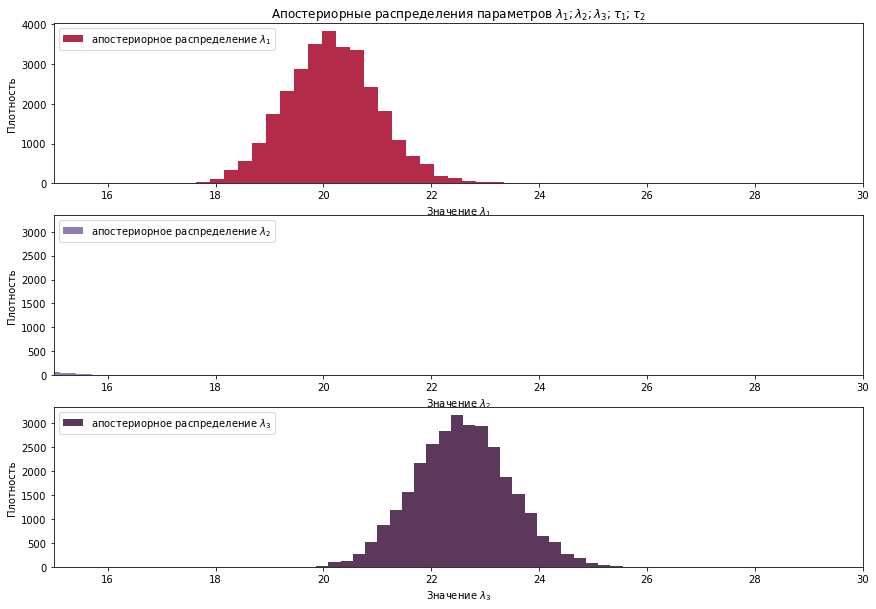

In [85]:
lambda_1_samples = mcmc.trace('lambda_1')[:]
lambda_2_samples = mcmc.trace('lambda_2')[:]
lambda_3_samples = mcmc.trace('lambda_3')[:]
tau_1_samples = mcmc.trace('tau_1')[:]
tau_2_samples = mcmc.trace('tau_2')[:]

figsize(14.5, 10)

# Гистограмма выборок
#----------------------------lambda_1------------------------------------------- 
ax = plt.subplot(311)
ax.set_autoscaley_on(True)

plt.title(r"Апостериорные распределения параметров $\lambda_1; \lambda_2; \lambda_3; \tau_1; \tau_2 $")

plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label=r"апостериорное распределение $\lambda_1$", color="#A60628",
         )
plt.legend(loc="upper left")

plt.xlim([15, 30])
plt.xlabel(r"Значение $\lambda_1$")
plt.ylabel("Плотность")


#----------------------------lambda_2------------------------------------------- 
ax = plt.subplot(312)
ax.set_autoscaley_on(True)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label=r"апостериорное распределение $\lambda_2$", color="#7A68A6",
         )
plt.legend(loc="upper left")
plt.xlim([15, 30])
plt.xlabel(r"Значение $\lambda_2$")
plt.ylabel("Плотность")

#------------------------------lambda_3-----------------------------------------------

plt.subplot(313)
ax.set_autoscaley_on(True)

plt.hist(lambda_3_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label=r"апостериорное распределение $\lambda_3$", color="#3F153F",
         )
plt.legend(loc="upper left")
plt.xlim([15, 30])
plt.xlabel(r"Значение $\lambda_3$")
plt.ylabel("Плотность")


#------------------------tau_1----------------------------------------------
figsize(14.5, 10)

ax1 = plt.subplot(314)
ax1.set_autoscaley_on(True)



w = 1.0 / tau_1_samples.shape[0] * np.ones_like(tau_1_samples)
plt.hist(tau_1_samples, bins=n_count_data, alpha=1,
         label=r"апостериорное распределение $\tau_1$", color="#A60628",
         weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))
plt.legend(loc="upper left")
plt.ylim([0, .75])
plt.xlim([35, len(count_data)-20])
plt.xlabel(r"$\tau_1$ (в днях)")
plt.ylabel("Вероятность");

#----------------------------tau_2---------------------------------------------
plt.subplot(315)

w = 1.0 / tau_2_samples.shape[0] * np.ones_like(tau_2_samples)
plt.hist(tau_2_samples, bins=n_count_data, alpha=1,
         label=r"апостериорное распределение $\tau2$", color="#2A2A00",
         weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))
plt.legend(loc="upper left")
plt.ylim([0, .75])
plt.xlim([35, len(count_data)-20])
plt.xlabel(r"$\tau_2$ (в днях)")
plt.ylabel("Вероятность");

1.7.  Упражнения